In [4]:
import warnings

warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import torch
import numpy as np

from torch.optim import AdamW
from torch.optim.lr_scheduler import OneCycleLR
from torch import nn
from torch.utils.data import random_split, DataLoader
from forest_cover_change_detection.dataloaders.change import ChangeDetectionDataset
from forest_cover_change_detection.models.fc_ef import FCFE
from forest_cover_change_detection.trainer.train import Compile

### Loading Data

In [2]:
data_set = ChangeDetectionDataset('../data/annotated',
                                  '../data/new_train.csv'
                                  )

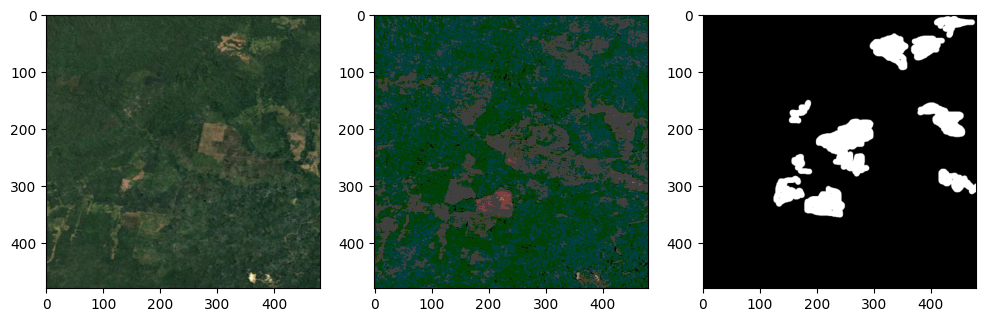

In [7]:
img, label = data_set[400]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 8), dpi=100)
axes = axes.ravel()

axes[0].imshow(img[:3, ::].permute(1, 2, 0).numpy())
axes[1].imshow(img[3:, ::].permute(1, 2, 0).numpy())
axes[2].imshow(label.permute(1, 2, 0).numpy(), cmap='gray')

In [8]:
train_size = int(len(data_set) * 0.8)
test_size = len(data_set) - train_size

train_dataset, test_dataset = random_split(data_set, (train_size, test_size))

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [9]:
model = FCFE(6, 3)

In [10]:
optimizer = AdamW(model.parameters(), lr=0.001)
scheduler = OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=10, epochs=100)

compiled = Compile(model,
                   optimizer,
                   lr_scheduler=scheduler
                   )

In [8]:
compiled.summary((6, 480, 480))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 480, 480]             880
       BatchNorm2d-2         [-1, 16, 480, 480]              32
            Conv2d-3         [-1, 16, 480, 480]           2,320
       BatchNorm2d-4         [-1, 16, 480, 480]              32
         MaxPool2d-5         [-1, 16, 240, 240]               0
            Conv2d-6         [-1, 32, 240, 240]           4,640
       BatchNorm2d-7         [-1, 32, 240, 240]              64
            Conv2d-8         [-1, 32, 240, 240]           9,248
       BatchNorm2d-9         [-1, 32, 240, 240]              64
        MaxPool2d-10         [-1, 32, 120, 120]               0
           Conv2d-11         [-1, 64, 120, 120]          18,496
      BatchNorm2d-12         [-1, 64, 120, 120]             128
           Conv2d-13         [-1, 64, 120, 120]          36,928
      BatchNorm2d-14         [-1, 64, 1

In [11]:
results = compiled.train(train_dataloader,
                         nn.BCEWithLogitsLoss(),
                         100,
                         test_dataloader)

Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.5267647130816591


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.46107283463844884


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.3725293103386374


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.3045405103610112


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.24477749507801205


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.27357334013168627


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.18792999696497822


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.20128703117370605


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.16799541445923785


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.17357009190779465


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1630344057784361


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.19686903517979842


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1832522479634659


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.23341566438858324


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.17400571528603048


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.16303345331778893


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.16101122340735266


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.18547377104942614


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.15993043254403508


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.15931686930931532


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1573540897053831


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.16352768070422685


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1579194206233118


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.18202570023444983


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.15824224230121164


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.22633778934295362


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.15605665217427647


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.17686876826561415


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1580530521916408


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.2388073091323559


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1560846514561597


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.1718307504287133


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.15522714616621242


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.17272660250847155


Training:   0%|          | 0/51 [00:00<?, ?it/s]

train loss: 0.1544937470964357


Validation:   0%|          | 0/13 [00:00<?, ?it/s]

val loss: 0.15510005561205056


Training:   0%|          | 0/51 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [12]:
img = test_dataset[0][0]

with torch.no_grad():
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.sigmoid(logits) >= 0.5

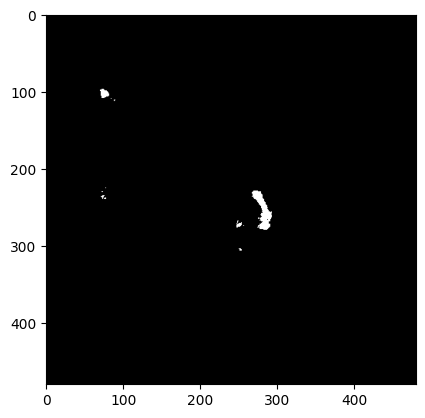

In [13]:
plt.imshow(pred.permute(1, 2, 0).numpy(), cmap='gray')

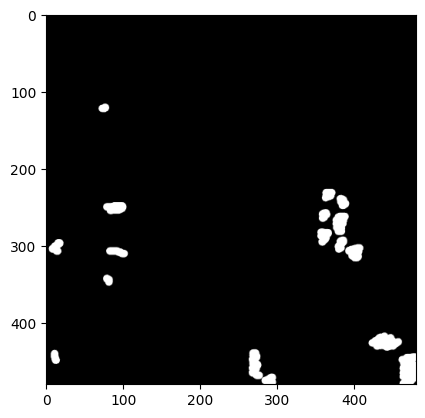

In [14]:
plt.imshow(test_dataset[0][1].permute(1, 2, 0).numpy(), cmap='gray')